Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2017.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [72]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


1. топ-10 стран по Happiness.Score

<AxesSubplot:title={'center':'top-10'}, xlabel='Country', ylabel='Happiness Score'>

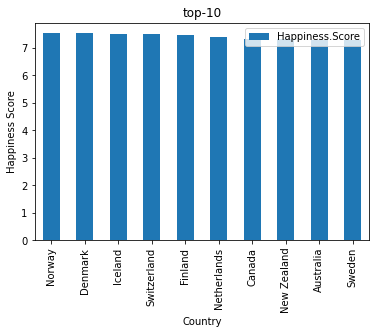

In [92]:
top10_countries = df[['Country', 'Happiness.Score']].groupby(by='Country').mean().sort_values(by='Happiness.Score', ascending=False).head(10)
top10_countries.plot(kind='bar', title='top-10', xlabel='Country', ylabel='Happiness Score')

Видим, что по данным 2017 года страны с наивысшим рейтингом счастья: Норвегия, Дания, Исландия, Швейцария и Финляндия. 
Рейтинг примерно одинаков. 
2. Тк не очень показательно, раскрасим лучше таблицу:

In [93]:
top10_countries.style.bar(align='mid')

,Happiness.Score
Country,
Norway,7.537000
Denmark,7.522000
Iceland,7.504000
Switzerland,7.494000
Finland,7.469000
Netherlands,7.377000
Canada,7.316000
New Zealand,7.314000
Australia,7.284000


3. Посмотрим все страны и рейтинги на heatmap:

In [49]:
all_countries = df[['Country', 'Happiness.Score']]
all_countries.head()

,Country,Happiness.Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


In [52]:
all_countries = all_countries.set_index('Country')
all_countries.head()

,Happiness.Score
Country,
Norway,7.537
Denmark,7.522
Iceland,7.504
Switzerland,7.494
Finland,7.469


<AxesSubplot:ylabel='Country'>

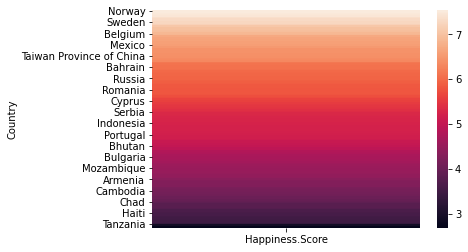

In [53]:
sns.heatmap(all_countries)

Видим, что низкий уровень счастья в странах третьего мира, высокий - в скандинавских странах.

4. Разделим страны по уровню счастья на группы и посмотрим, как распределен доход в этих группах.

In [110]:
min_value = df['Happiness.Score'].min()
max_value = df['Happiness.Score'].max()

In [111]:
import numpy as np
bins = np.linspace(min_value,max_value, 4)
bins

array([2.69300008, 4.30766678, 5.92233348, 7.53700018])

In [112]:
labels = ['low', 'medium', 'high']

In [113]:
df['bins'] = pd.cut(df['Happiness.Score'], bins=bins, labels=labels, include_lowest=True)

<AxesSubplot:xlabel='bins', ylabel='Economy..GDP.per.Capita.'>

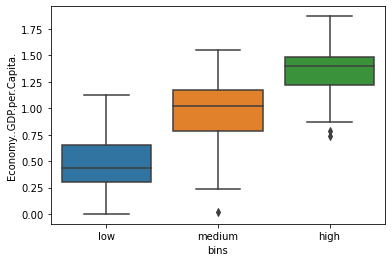

In [114]:
sns.boxplot(x='bins', y='Economy..GDP.per.Capita.', 
            data=df)

видим, что в группе стран с самыми счастливыми людьми у людей высокий средний уровень дохода, выше 1,25, тогда, как в группе с низким уровнем счастья - менее 0,50, и даже встречается 0. 

4. взаимосвязь Family, Happiness.Score

<AxesSubplot:title={'center':'Family-Happiness score correlation'}, xlabel='Family', ylabel='Happiness.Score'>

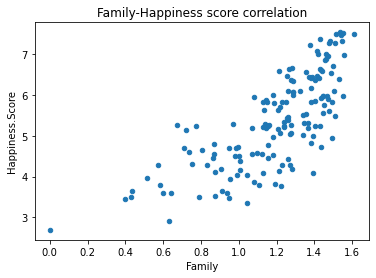

In [22]:
df.plot(kind='scatter', x='Family', 
        y='Happiness.Score', title='Family-Happiness score correlation')

Явно видим, что люди с большей семьей оценивают себя, как более счастливые. 
5. добавим третью ось - страны.

In [32]:
df_top_hs = df[['Country', 'Family', 'Happiness.Score']].groupby(by='Country', as_index=False).mean().sort_values(by='Happiness.Score', ascending=False).head(10)
df_top_hs

,Country,Family,Happiness.Score
104,Norway,1.533524,7.537
37,Denmark,1.551122,7.522
57,Iceland,1.610574,7.504
132,Switzerland,1.516912,7.494
44,Finland,1.540247,7.469
98,Netherlands,1.428939,7.377
25,Canada,1.481349,7.316
99,New Zealand,1.548195,7.314
6,Australia,1.510042,7.284
131,Sweden,1.478162,7.284


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

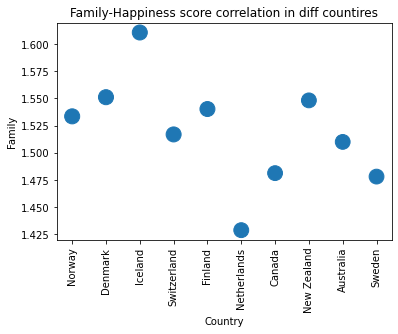

In [37]:
df_top_hs.plot(kind='scatter', 
        x='Country', 
        y='Family', 
        s=df_top_hs['Happiness.Score']*30,
        title='Family-Happiness score correlation in diff countires',
       )
plt.xticks(rotation=90)

In [ ]:
Видим, что в топ-5 стран большие семьи (особенно, в Исландии), но в то же время 6ая страна - Нидерланды, и там семьи у счастливых людей меньше.

6. взаимосвязь Economy..GDP.per.Capita., Health..Life.Expectancy с Happiness.Score

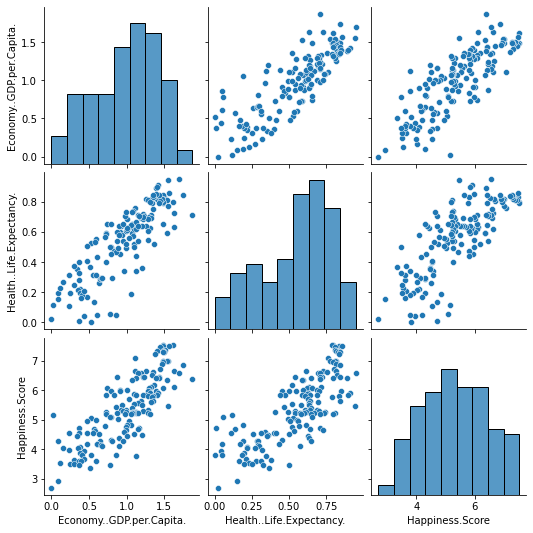

In [81]:
sns.pairplot(df[['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Happiness.Score']])

из графиков выше видим, что есть положительная линейная связь между продолжительностью жизни и уровнем счастья, а также между уровнем дохода и уровнем счастья. 

7. взаимосвязь Freedom, Generosity, Happiness.Score

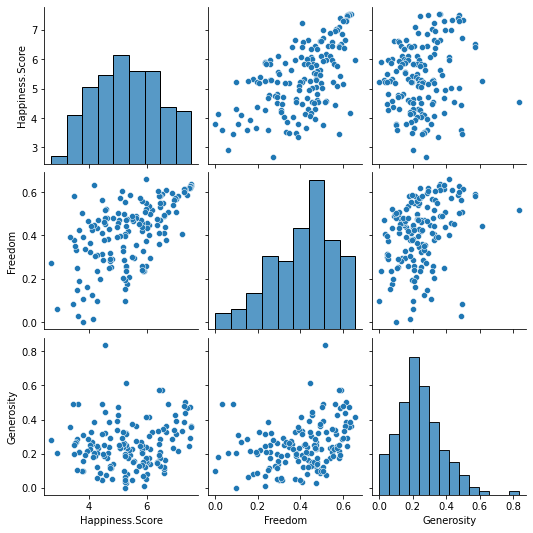

In [78]:
sns.pairplot(df[['Happiness.Score', 'Freedom', 'Generosity']])

из графиков выше видим, что есть положительная линейная связь между уровнем свободы и уровнем счастья. 
Щедрость и уровень счастья рспределены равномерно, кажется, что зависимости нет. 